In [2]:
# Loading dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("/content/titanic.csv")
print("Initial Data:\n", df.head())
print("\nShape : ", df.shape)

Initial Data:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

In [3]:
# Checking missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# Imputation
# Numeric columns → fill with mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

# Categorical columns → fill with mode
categorical_cols = df.select_dtypes(exclude=[np.number]).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Label Encoding for categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

    # Check missing values after imputation
print("Missing Values after imputation:\n", df.isnull().sum())

Missing Values after imputation:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [5]:
# Data Cleaning
# Remove duplicates
df.drop_duplicates(inplace=True)

# Remove unnecessary spaces in column names
df.columns = df.columns.str.strip()

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

In [6]:
# Final processed data
print("Processed Data:\n")
print(df.head())

df.to_csv("/content/sample_data/titanic_processed.csv", index=False)
print("\nProcessed file saved as titanic_processed.csv")

Processed Data:

   PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0            1         0       3   108    1  22.0      1      0     523   
1            2         1       1   190    0  38.0      1      0     596   
2            3         1       3   353    0  26.0      0      0     669   
3            4         1       1   272    0  35.0      1      0      49   
4            5         0       3    15    1  35.0      0      0     472   

      Fare  Cabin  Embarked  
0   7.2500     47         2  
1  71.2833     81         0  
2   7.9250     47         2  
3  53.1000     55         2  
4   8.0500     47         2  

Processed file saved as titanic_processed.csv


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x=df.drop('Survived',axis=1)
y=df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [8]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7877094972067039


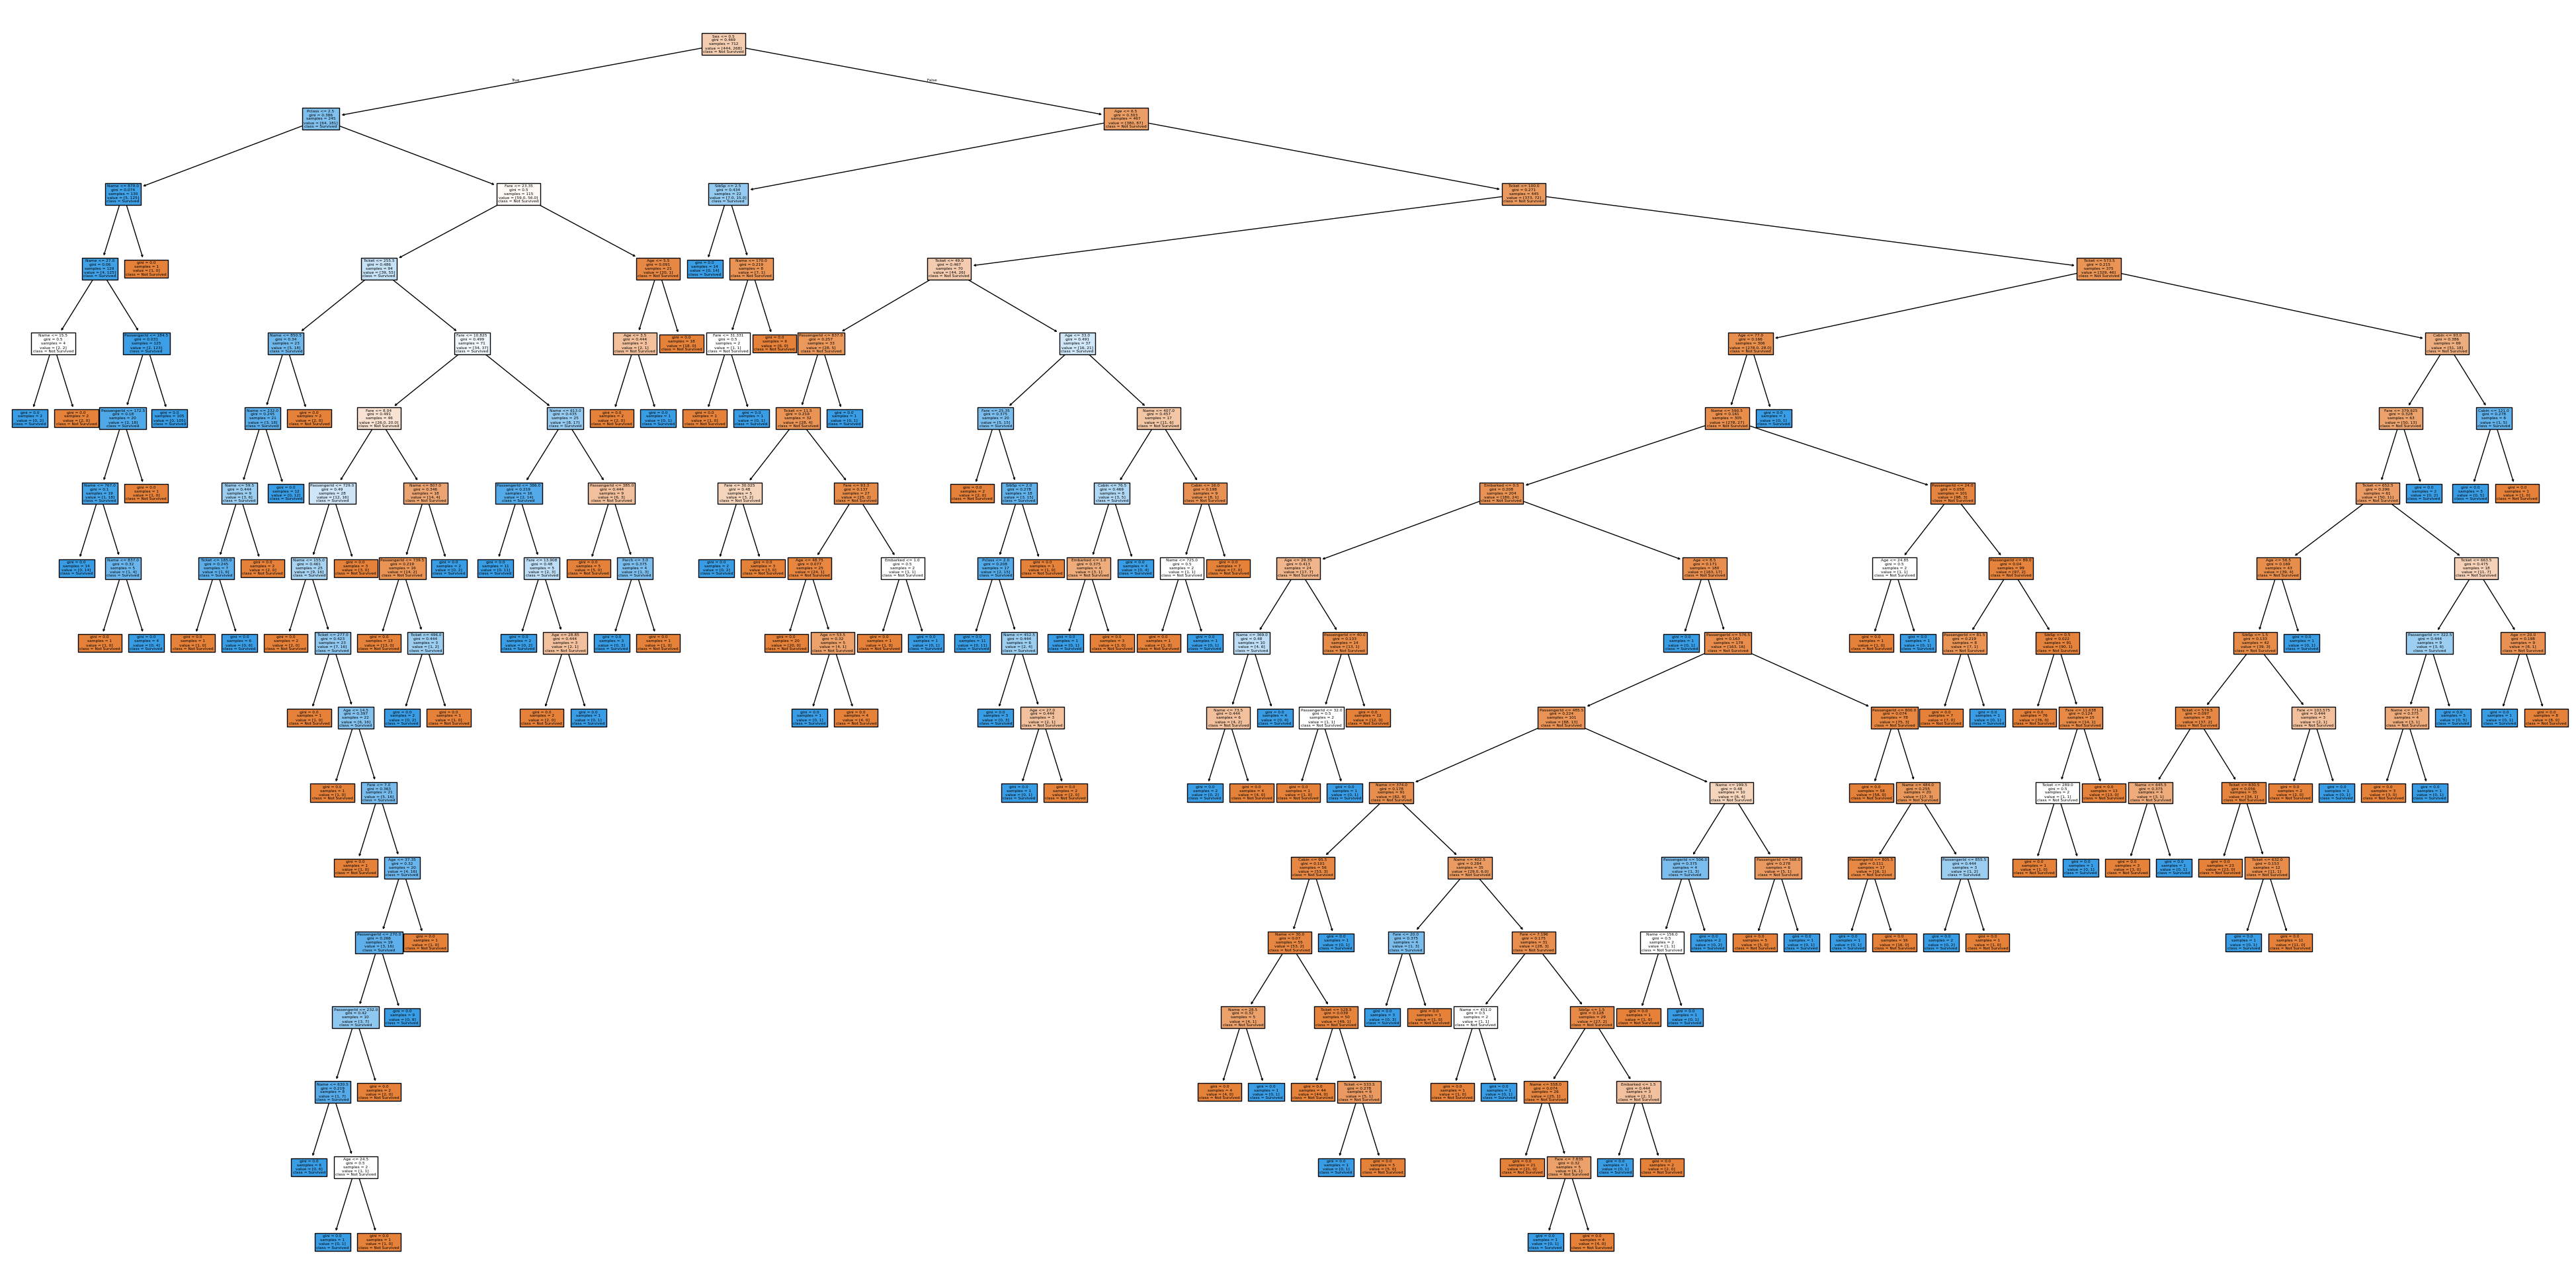

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 25))
plot_tree(model, filled=True, feature_names=x.columns, class_names=['Not Survived', 'Survived'])
plt.show()

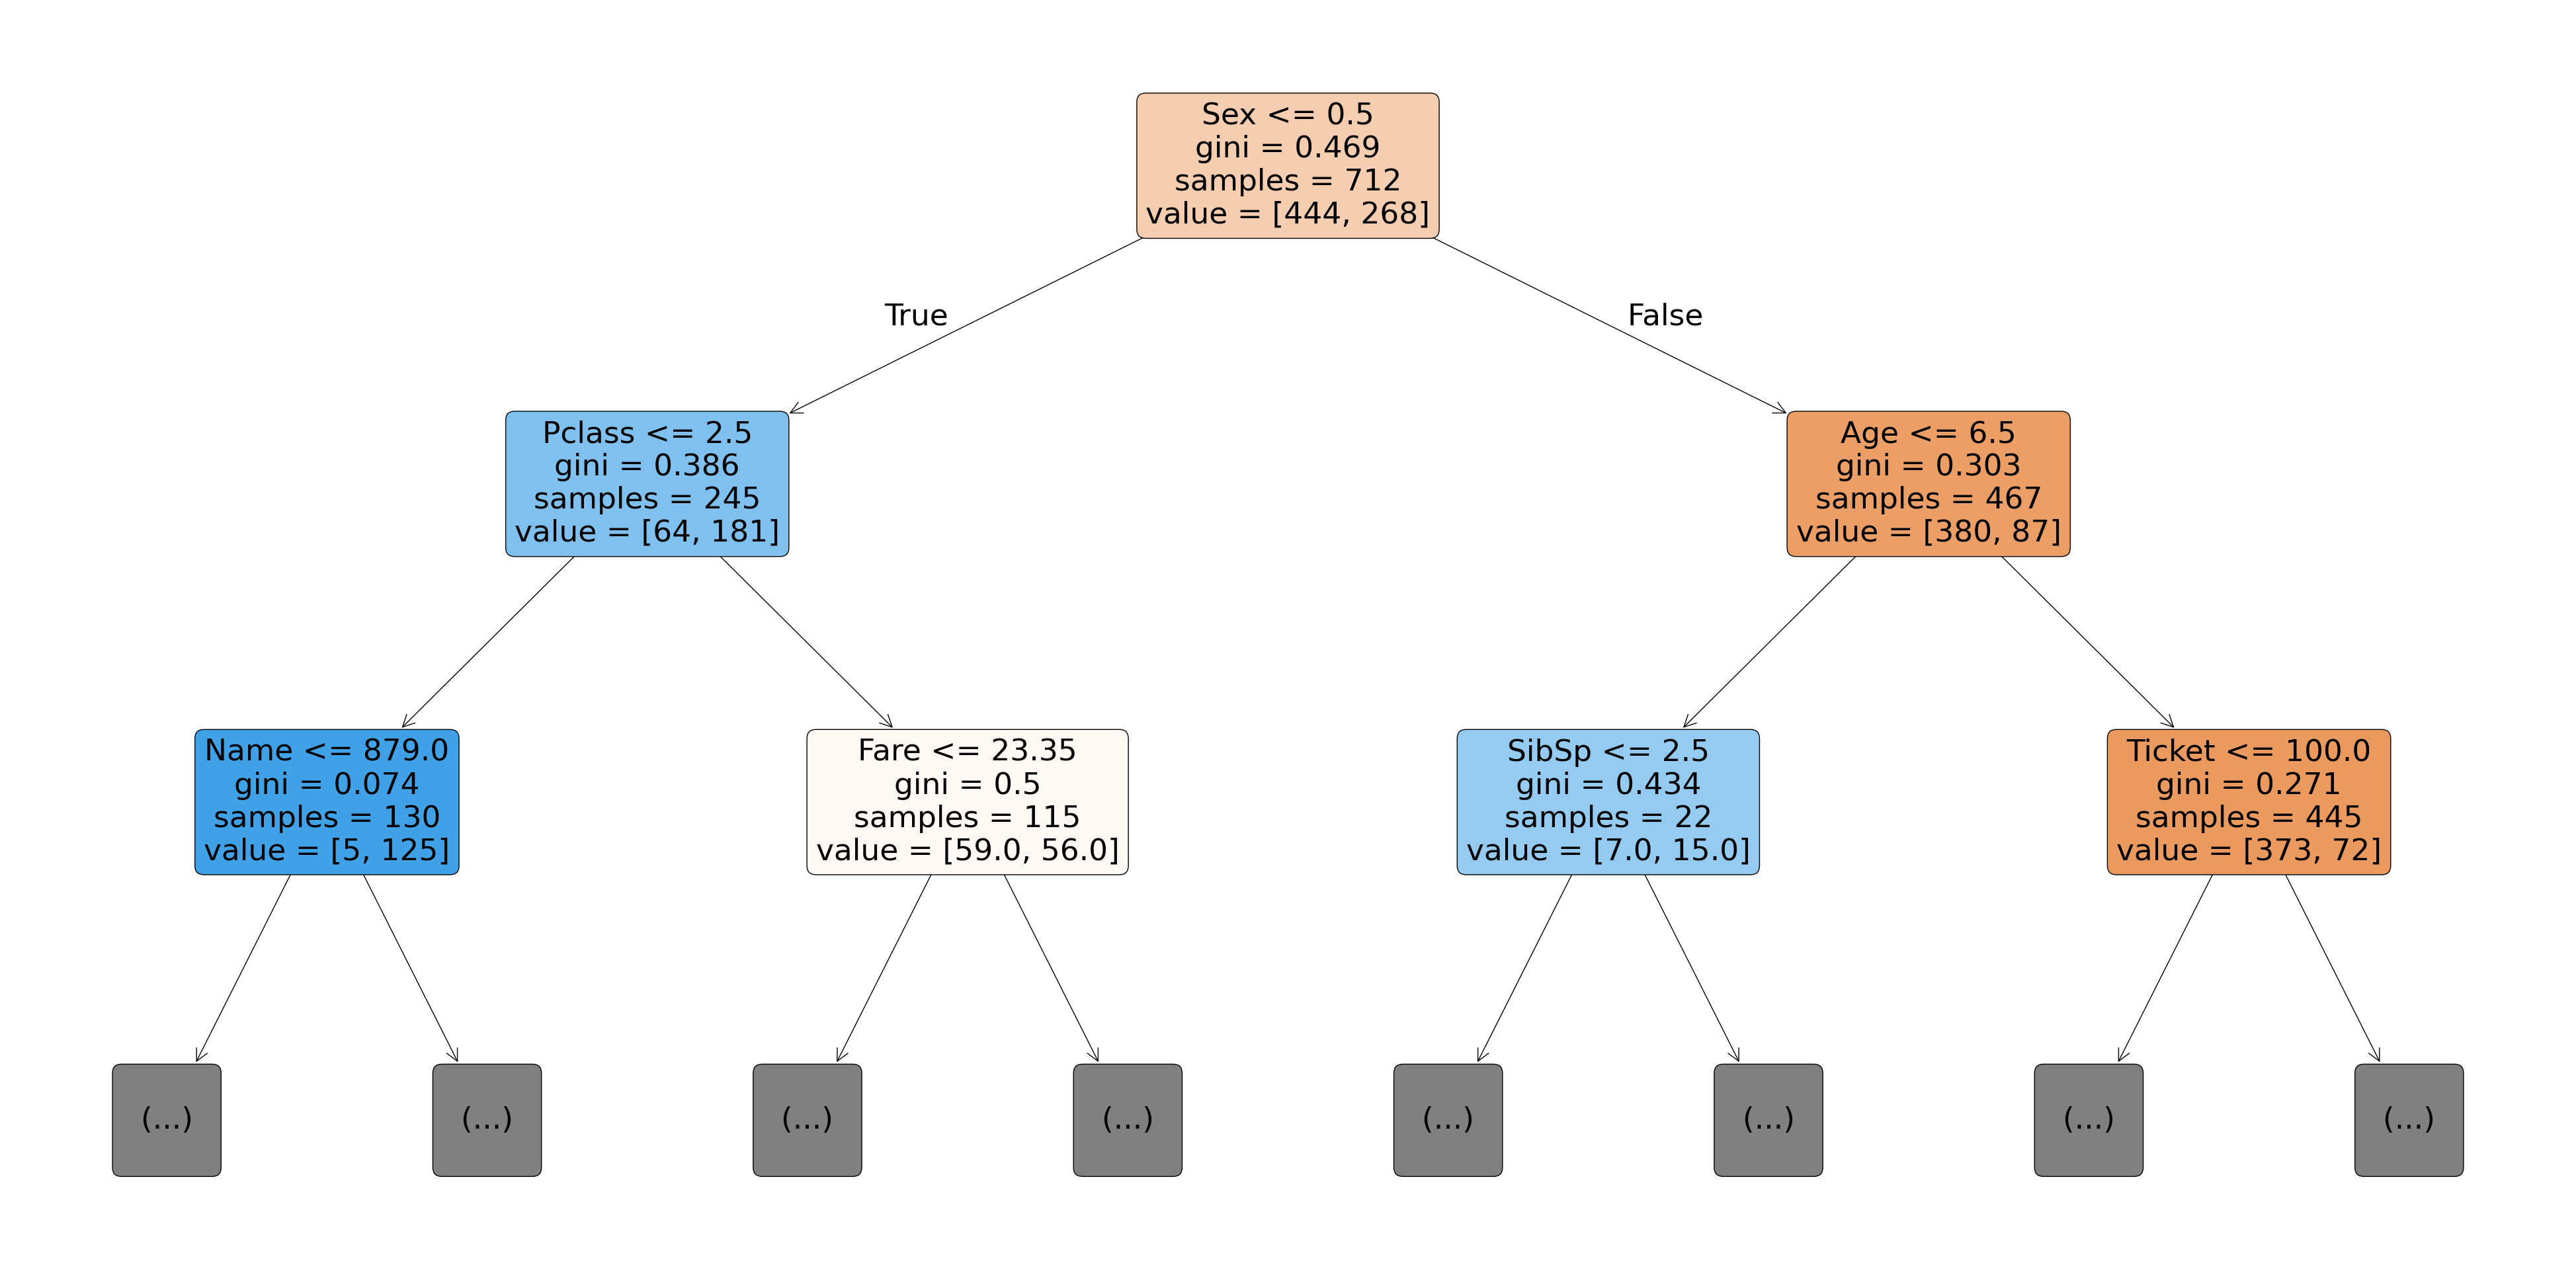

In [10]:
features = df.drop('Survived',axis='columns')
target = df['Survived']

plt.figure(figsize=(50,25))
plot_tree(model,filled=True,rounded=True,feature_names=features.columns, max_depth=2)
plt.show()

In [11]:
# 1. Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm, "\n")

# 3. Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.7877

Confusion Matrix:
[[88 17]
 [21 53]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [13]:
import pickle
pickle.dump(model,open('titanic.pkl','wb'))